<a href="https://colab.research.google.com/github/GlitzOfStenz/PRODIGY_DS_04/blob/main/PRODIGY_DS_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install textblob

In [ ]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [ ]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/twitter_training.csv (1).zip')


In [ ]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
data.shape


(74681, 4)

In [ ]:
col_names=['ID','Entity','Sentiments','Contest']
df=pd.read_csv('/content/twitter_training.csv (1).zip',names=col_names)
df.head()

,ID,Entity,Sentiments,Contest
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [ ]:
df.shape

(74682, 4)

In [ ]:
df.describe()

,ID
count,74682.000000
mean,6432.586165
std,3740.427870
min,1.000000
25%,3195.000000
50%,6422.000000
75%,9601.000000
max,13200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          74682 non-null  int64 
 1   Entity      74682 non-null  object
 2   Sentiments  74682 non-null  object
 3   Contest     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [ ]:
df.isnull().sum()

,0
ID,0
Entity,0
Sentiments,0
Contest,686


In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.isnull().sum()

,0
ID,0
Entity,0
Sentiments,0
Contest,0


In [ ]:
df.duplicated().sum()

2700

In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [ ]:
sentiment_counts=df['Sentiments'].value_counts()
sentiment_counts

,count
Sentiments,
Negative,21698
Positive,19713
Neutral,17708
Irrelevant,12537


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(71656, 4)

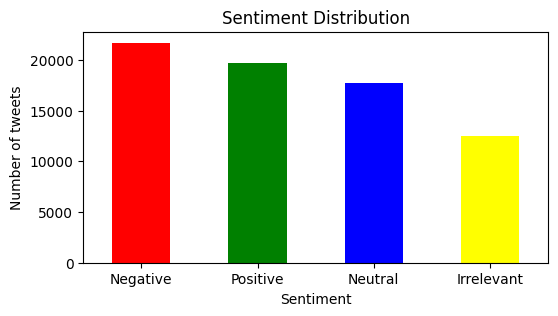

In [ ]:
plt.figure(figsize=(6,3))
sentiment_counts.plot(kind='bar',color=['red','green','blue','yellow'])
plt.title("Sentiment Distribution")
plt.xlabel('Sentiment')
plt.ylabel('Number of tweets')
plt.xticks(rotation=0)
plt.show()

In [ ]:
brand_data=df[df['Entity'].str.contains('Microsoft',case=False)]
brand_sentiment_counts=brand_data['Sentiments'].value_counts()
brand_sentiment_counts

,count
Sentiments,
Neutral,816
Negative,748
Positive,573
Irrelevant,167


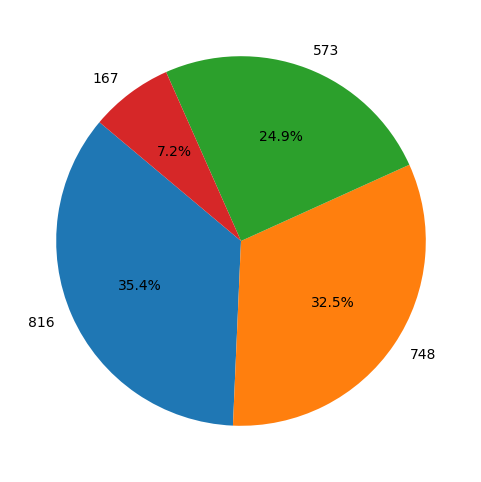

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(brand_sentiment_counts, labels=brand_sentiment_counts, autopct='%1.1f%%', startangle=140)
plt.show()
